In [1]:
from ES import ES
import numpy as np

## Zadanie 2.
Przystosuj zaimplementowane algorytmy do rozwiązywania problemów optymalizacji z ograniczeniami (według własnych pomysłów). Wybierz 5 benchmarków z ograniczeniami i użyj zaimplementowanych algorytmów do ich rozwiązywania. Dokładnie przeanalizuj działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.

http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO_files/Page422.htm

#### Used benchmarks:
- G1 Problem
- G2 Problem
- G6 Problem
- G8 Problem
- G10 Problem

### G1 Problem
$f(x) = 5\sum_{i=1}^4 x_i - 5\sum_{i=1}^4 x_i^2 - \sum_{i=5}^{13}x_i \\\\
s.t. g_1(x) =  2x_1 + 2_2 + x_{10} + x_{11} - 10 \leq 0 \\\\
\qquad g_2(x) = 2x_1 + 2x_2 + x_{10} + x_{12} - 10 \leq 0 \\\\
\qquad g_3(x) = 2x_1 + 2x_2 + x_{10} + x_{12} - 10 \leq 0 \\\\
\qquad g_4(x) = - 8x_1 + x_{10} \leq 0 \\\\
\qquad g_5(x) = - 8x_3 + x_{12} \leq 0 \\\\
\qquad g_6(x) = - 8x_3 + x_{12} \leq 0 \\\\
\qquad g_7(x) = - 2x_4 - x_5 + x_{10} \leq 0 \\\\
\qquad g_8(x) = - 2x_6 - x_8 + x_{11} \leq 0 \\\\
\qquad g_9(x) = - 2x_8 - x_9 + x_{12} \leq 0$

In [9]:
def g1p(population):
    g1v = np.array([2*x[0] + 2*x[1] + x[9] + x[10] - 10 for x in population[:, 0]])
    g2v = np.array([2*x[0] + 2*x[2] + x[9] + x[11] - 10 for x in population[:, 0]])
    g3v = np.array([2*x[1] + 2*x[2] + x[10] + x[11] - 10 for x in population[:, 0]])
    g4v = np.array([-8*x[0] + x[9] for x in population[:, 0]])
    g5v = np.array([-8*x[2] + x[11] for x in population[:, 0]])
    g6v = np.array([-8*x[2] + x[11] for x in population[:, 0]])
    g7v = np.array([-2*x[3] - x[4] + x[9] for x in population[:, 0]])
    g8v = np.array([-2*x[5] - x[6] + x[10] for x in population[:, 0]])
    g9v = np.array([-2*x[7] - x[8] + x[11] for x in population[:, 0]])
    
    costs = np.array([5*sum(x[:4]) - 5*sum(x[:4]**2) - sum(x[4:]) for x in population[:,0]])
    not_good_constrains = np.sum(np.vstack((g1v > 0, g2v > 0, g3v > 0, g4v > 0, g5v > 0, g6v > 0, g7v > 0, g8v > 0, g9v > 0)), axis=0)
    costs += 1e10 * not_good_constrains
    
    return costs

iter: 0,	min: 4e+10,	mean: 8.731e+10,	max: 9e+10
iter: 200,	min: 1e+10,	mean: 5.517e+10,	max: 6e+10
iter: 400,	min: 1e+10,	mean: 5.071e+10,	max: 6e+10
iter: 600,	min: 1e+10,	mean: 4.64e+10,	max: 6e+10
iter: 800,	min: 1e+10,	mean: 4.42e+10,	max: 5e+10
iter: 1000,	min: 1e+10,	mean: 4.262e+10,	max: 5e+10
iter: 1200,	min: 1e+10,	mean: 4.104e+10,	max: 5e+10
iter: 1400,	min: 1e+10,	mean: 3.956e+10,	max: 5e+10
iter: 1600,	min: -1.7479,	mean: 3.803e+10,	max: 5e+10
iter: 1800,	min: -1.7479,	mean: 3.688e+10,	max: 4e+10
iter: 2000,	min: -1.7479,	mean: 3.653e+10,	max: 4e+10
iter: 2200,	min: -1.7479,	mean: 3.623e+10,	max: 4e+10
iter: 2400,	min: -1.7479,	mean: 3.592e+10,	max: 4e+10
iter: 2600,	min: -1.7479,	mean: 3.537e+10,	max: 4e+10
iter: 2800,	min: -1.7479,	mean: 3.49e+10,	max: 4e+10
iter: 3000,	min: -1.7479,	mean: 3.467e+10,	max: 4e+10
iter: 3200,	min: -1.7479,	mean: 3.429e+10,	max: 4e+10
iter: 3400,	min: -1.7479,	mean: 3.391e+10,	max: 4e+10
iter: 3600,	min: -1.7479,	mean: 3.358e+10,	max: 4e+10


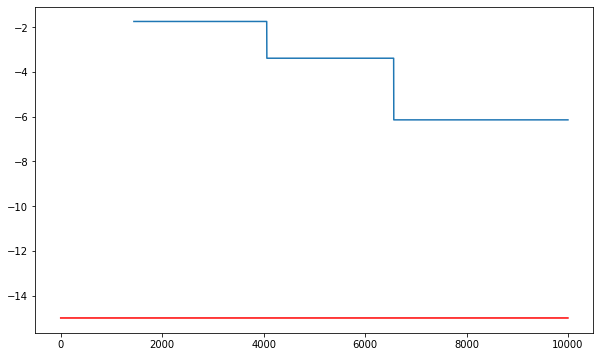


Best cost function: -6.14554 at iter: 6564


In [15]:
dims = 13

lr = 0.01
tau0, tau = lr/np.sqrt(2 * np.sqrt(dims)), lr/np.sqrt(2*dims)

domain = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 100), (0, 100), (0, 100), (0, 1)]

es = ES(domain=domain, dims=dims, population_size=1000, offspring_size=500, 
        parent_choice_method='roulette', replacement_method='mulambda', tau=tau, 
        tau0=tau0, cost_func=g1p, max_iters=10000)

es.run(verbose=True, with_tqdm=False, log_interv=200)
es.history(glob_min=-15, with_plot=True)

#### optimum = -15 at (1, ..., 1, 3, 3, 3, 1)

In [16]:
es.best_ind[0]

array([0.53581473, 0.07620481, 0.37195766, 0.94441797, 0.52559474,
       0.93670571, 0.69090056, 0.91409842, 0.88938444, 1.00223445,
       1.70835882, 2.22887811, 0.2754492 ])

### G2 Problem (modified by adding '-' because we want to minimize cost function)
$f(x) = - |\frac{\sum_{i=1}^n \cos ^4(x_i) - 2 \prod_{i=1}^{n} \cos ^2(x_i)}{\sqrt{ \sum_{i=1}^ni x_i^2}}| \\\\
s.t. g_1(x) = - \prod_{i=1}^{n}x_i + 0.75 \leq 0,\\\\
\qquad g_2(x) = \sum_{i=1}^{n}x_i - 7.5n \leq 0$

In [5]:
def g2p(population):
    dims = population.shape[-1]
    g1v = np.array([-np.prod(x) + 0.75 for x in population[:,0]])
    g2v = np.array([np.sum(x) - 7.5*len(x) for x in population[:,0]])
    costs = - np.abs(np.array([((np.cos(x)**4).sum() - 2*np.prod(np.cos(x)**2)) / \
                               np.sqrt((x**2 * np.arange(1, dims+1)).sum()) 
                               for x in population[:,0]]))
    
    not_good_constrains = np.sum(np.vstack((g1v > 0, g2v > 0)), axis=0)
    costs += 1e10 * not_good_constrains
    
    return costs

In [6]:
dims = 20

lr = 0.01
tau0, tau = lr/np.sqrt(2 * np.sqrt(dims)), lr/np.sqrt(2*dims)

es = ES(domain=(0, 10), dims=dims, population_size=1000, offspring_size=1000, 
        parent_choice_method='roulette', replacement_method='mulambda', tau=tau, 
        tau0=tau0, cost_func=g2p, max_iters=10000)

iter: 0,	min: -0.18886,	mean: -0.11533,	max: -0.095852
iter: 200,	min: -0.51278,	mean: -0.36728,	max: -0.34092
iter: 400,	min: -0.53117,	mean: -0.39692,	max: -0.37174
iter: 600,	min: -0.53117,	mean: -0.41371,	max: -0.38872
iter: 800,	min: -0.54372,	mean: -0.42487,	max: -0.4001
iter: 1000,	min: -0.54372,	mean: -0.4324,	max: -0.40876
iter: 1200,	min: -0.56045,	mean: -0.4392,	max: -0.41643
iter: 1400,	min: -0.56045,	mean: -0.44569,	max: -0.42243
iter: 1600,	min: -0.58997,	mean: -0.45081,	max: -0.42729
iter: 1800,	min: -0.58997,	mean: -0.45475,	max: -0.43154
iter: 2000,	min: -0.58997,	mean: -0.45779,	max: -0.43489
iter: 2200,	min: -0.58997,	mean: -0.46076,	max: -0.43808
iter: 2400,	min: -0.58997,	mean: -0.46371,	max: -0.44112
iter: 2600,	min: -0.58997,	mean: -0.46689,	max: -0.44454
iter: 2800,	min: -0.58997,	mean: -0.46955,	max: -0.44723
iter: 3000,	min: -0.58997,	mean: -0.47195,	max: -0.44975
iter: 3200,	min: -0.58997,	mean: -0.4739,	max: -0.4522
iter: 3400,	min: -0.58997,	mean: -0.47588,

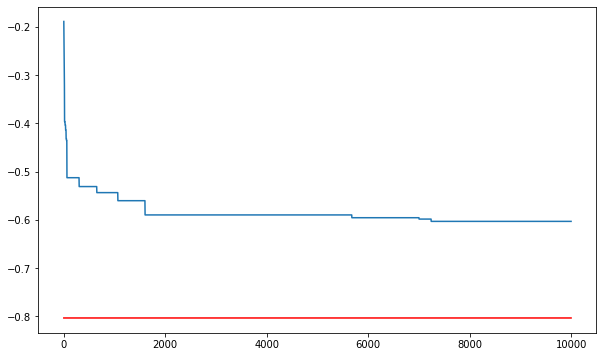


Best cost function: -0.60333 at iter: 7240


In [7]:
es.run(verbose=True, with_tqdm=False, log_interv=200)
es.history(glob_min=-0.803619, with_plot=True)

#### optimum = -0.803619

### G6 Problem
$f(x) = (x_1 - 10)^3 + (x_2 - 20)^3 \\\\
s.t. g_1(x) = - (x_1 - 5)^2 - (x_2 - 5)^2 + 100 \leq 0 \\\\
\qquad g_2(x) = (x_1 - 6)^2 + (x_2 - 5)^2 - 82.81 \leq 0$

In [2]:
def g6p(population):
    costs = [(x[0] - 10)**3 + (x[1]-20)**3 for x in population[:,0]]
    
    g1v = np.array([-(x[0]-5)**2 - (x[1] - 5)**2 + 100 for x in population[:,0]])
    g2v = np.array([(x[0]-6)**2 + (x[1] - 5)**2 - 82.81 for x in population[:,0]])
    
    not_good_constrains = np.sum(np.vstack((g1v > 0, g2v > 0)), axis=0)
    costs += 1e10 * not_good_constrains
    
    return costs

iter: 0,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 200,	min: -6925.1,	mean: -5861.6,	max: -5328.0
iter: 400,	min: -6925.1,	mean: -6269.1,	max: -5924.1
iter: 600,	min: -6925.1,	mean: -6428.7,	max: -6174.5
iter: 800,	min: -6939.5,	mean: -6520.6,	max: -6305.6
iter: 1000,	min: -6939.5,	mean: -6575.3,	max: -6389.5
iter: 1200,	min: -6939.5,	mean: -6612.4,	max: -6445.1
iter: 1400,	min: -6939.5,	mean: -6639.0,	max: -6484.4
iter: 1600,	min: -6941.0,	mean: -6666.7,	max: -6524.8
iter: 1800,	min: -6941.0,	mean: -6683.2,	max: -6549.4
iter: 2000,	min: -6941.0,	mean: -6698.2,	max: -6569.5
iter: 2200,	min: -6941.0,	mean: -6710.7,	max: -6585.9
iter: 2400,	min: -6941.0,	mean: -6720.8,	max: -6600.5
iter: 2600,	min: -6957.3,	mean: -6729.7,	max: -6614.6
iter: 2800,	min: -6957.3,	mean: -6738.4,	max: -6626.4
iter: 3000,	min: -6957.3,	mean: -6747.4,	max: -6639.2
iter: 3200,	min: -6957.3,	mean: -6754.7,	max: -6648.2
iter: 3400,	min: -6957.3,	mean: -6762.9,	max: -6661.1
iter: 3600,	min: -6957.3,	mean: -6768.4,	

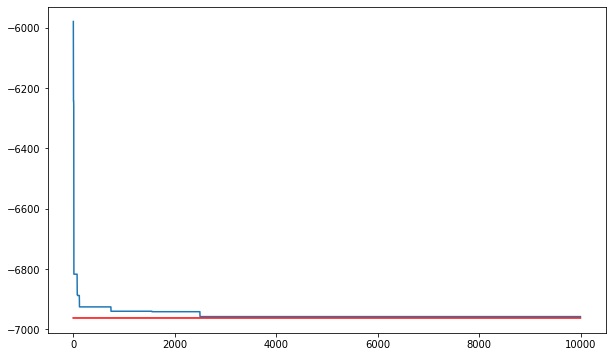


Best cost function: -6957.28648 at iter: 2498


In [5]:
dims = 2

lr = 0.01
tau0, tau = lr/np.sqrt(2 * np.sqrt(dims)), lr/np.sqrt(2*dims)
domain = [(13, 100), (0, 100)]

es = ES(domain=domain, dims=dims, population_size=1000, offspring_size=1000, 
        parent_choice_method='roulette', replacement_method='mulambda', tau=tau, 
        tau0=tau0, cost_func=g6p, max_iters=10000)

es.run(verbose=True, with_tqdm=False, log_interv=200)
es.history(glob_min=-6961.81388, with_plot=True)

#### optimum = -6961.81388 at (14.095, 0.84296)

In [6]:
es.best_ind[0]

array([14.09706109,  0.84697958])

### G8 Problem
$f(x) = - \frac{\sin^3(2\pi x_1) * \sin(2\pi x_2)}{x_1^3(x_1+x_2)} \\\\
s.t. g_1(x) = x_1^2 - x_2 + 1 \leq 0 \\\\
\qquad g(2) = 1 - x_1 + (x_2-4)^2 \leq 0$

In [16]:
def g8p(population):
    costs = - np.array([np.sin(2*np.pi * x[0])**3 * np.sin(2*np.pi * x[1]) / (x[0]**3 * (x[0]+x[1])) 
                        for x in population[:,0]])
    g1v = np.array([x[0]**2 - x[1] + 1 for x in population[:,0]])
    g2v = np.array([1-x[0] + (x[1]-4)**2 for x in population[:,0]])
    
    not_good_constrains = np.sum(np.vstack((g1v > 0, g2v > 0)), axis=0)
    costs += 1e10 * not_good_constrains
    
    return costs

iter: 0,	min: -0.053625,	mean: 1.048e+10,	max: 2e+10
iter: 200,	min: -0.095793,	mean: -0.078936,	max: -0.062869
iter: 400,	min: -0.095793,	mean: -0.087492,	max: -0.07912
iter: 600,	min: -0.095793,	mean: -0.090247,	max: -0.084926
iter: 800,	min: -0.095811,	mean: -0.091559,	max: -0.087368
iter: 1000,	min: -0.095824,	mean: -0.092432,	max: -0.089107
iter: 1200,	min: -0.095824,	mean: -0.092973,	max: -0.090206
iter: 1400,	min: -0.095824,	mean: -0.093407,	max: -0.091006
iter: 1600,	min: -0.095824,	mean: -0.093763,	max: -0.091607
iter: 1800,	min: -0.095824,	mean: -0.094025,	max: -0.092182
iter: 2000,	min: -0.095824,	mean: -0.094236,	max: -0.092621
iter: 2200,	min: -0.095824,	mean: -0.094358,	max: -0.092868
iter: 2400,	min: -0.095824,	mean: -0.094488,	max: -0.093139
iter: 2600,	min: -0.095824,	mean: -0.094588,	max: -0.093398
iter: 2800,	min: -0.095824,	mean: -0.094659,	max: -0.09354
iter: 3000,	min: -0.095824,	mean: -0.09477,	max: -0.093682
iter: 3200,	min: -0.095824,	mean: -0.094842,	max: -0.0

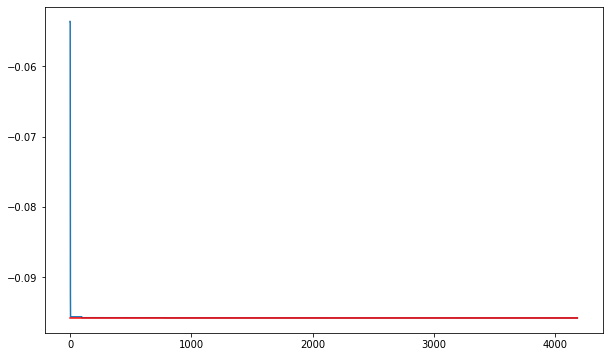


Best cost function: -0.09582 at iter: 983


In [17]:
dims = 2

lr = 0.01
tau0, tau = lr/np.sqrt(2 * np.sqrt(dims)), lr/np.sqrt(2*dims)

es = ES(domain=(0, 10), dims=dims, population_size=1000, offspring_size=500, 
        parent_choice_method='roulette', replacement_method='mulambda', tau=tau, 
        tau0=tau0, cost_func=g8p, max_iters=10000)

es.run(verbose=True, with_tqdm=False, log_interv=200)
es.history(glob_min=-0.095825, with_plot=True)

 #### optimum = - 0.095825 at (1.2279713, 4.2453733)

In [18]:
es.best_ind[0]

array([1.22830983, 4.24515066])

### G10 Problem
$f(x) = x_1 + x_2 + x_3 \\\\
s.t. g_1(x) = -1 + 0.0025(x_4 + x_6) \leq 0 \\\\
\qquad g_2(x) = -1 + 0.0025(-x_4 + x_5 + x_7) \leq 0 \\\\
\qquad g_3(x) = -1 + 0.01(-x_5 + x_8) \leq 0 \\\\
\qquad g_4(x) = 100x_1 - x_1x_6 + 833.33252x_4 - 83333.333 \leq 0 \\\\
\qquad g_5(x) = x_2x_4 - x_2x_7 - 1250x_4 + 1250x_5 \leq 0 \\\\
\qquad g_6(x) = x_3x_5 - x_3x_8 - 2500x_5 + 1250000 \leq 0$

In [2]:
def g10p(population):
    costs = np.array([x[0]+x[1]+x[2] for x in population[:,0]])
    
    g1v = np.array([-1 + 0.0025*(x[3] + x[5]) for x in population[:,0]])
    g2v = np.array([-1 + 0.0025*(-x[3] + x[4] + x[6]) for x in population[:,0]])
    g3v = np.array([-1 + 0.01*(-x[4] + x[7]) for x in population[:,0]])
    g4v = np.array([100*x[0] - x[0]*x[5] + 833.33242*x[3] - 83333.333 for x in population[:,0]])
    g5v = np.array([x[1]*x[3] - x[1]*x[6] - 1250*x[3] + 1250*x[4] for x in population[:,0]])
    g6v = np.array([x[2]*x[4] - x[2]*x[7] - 2500*x[4] + 1250000 for x in population[:,0]])
    
    not_good_constrains = np.sum(np.vstack((g1v > 0, g2v > 0, g3v > 0, g4v > 0, g5v > 0, g6v > 0)), axis=0)
    costs += 1e10 * not_good_constrains
    
    return costs

iter: 0,	min: 1e+10,	mean: 2.711e+10,	max: 3e+10
iter: 200,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 400,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 600,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 800,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 1000,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 1200,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 1400,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 1600,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 1800,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 2000,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 2200,	min: 1e+10,	mean: 1e+10,	max: 1e+10
iter: 2400,	min: 2.3943e+04,	mean: 2.3957e+04,	max: 2.3961e+04
iter: 2600,	min: 2.3399e+04,	mean: 2.3414e+04,	max: 2.3419e+04
iter: 2800,	min: 2.2808e+04,	mean: 2.2824e+04,	max: 2.283e+04
iter: 3000,	min: 2.2165e+04,	mean: 2.218e+04,	max: 2.2185e+04
iter: 3200,	min: 2.1477e+04,	mean: 2.1497e+04,	max: 2.1503e+04
iter: 3400,	min: 2.0811e+04,	mean: 2.0828e+04,	max: 2.0834e+04
iter: 3600,	min: 2.0136e+04,	mean: 2.0154e+04,	max:

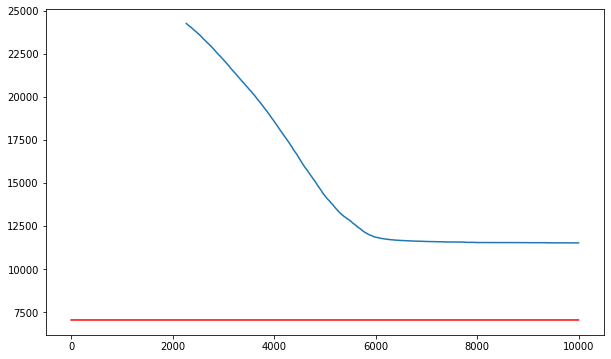


Best cost function: 11525.81443 at iter: 9411


In [7]:
dims = 8

lr = 0.01
tau0, tau = lr/np.sqrt(2 * np.sqrt(dims)), lr/np.sqrt(2*dims)

domain = [(100, 10000), (1000, 10000), (1000, 10000), (10, 1000), (10, 1000), (10, 1000), (10, 1000), (10, 1000)]

es = ES(domain=domain, dims=dims, population_size=1000, offspring_size=500, 
        parent_choice_method='roulette', replacement_method='mulambda', tau=tau, 
        tau0=tau0, cost_func=g10p, max_iters=10000)

es.run(verbose=True, with_tqdm=False, log_interv=200)
es.history(glob_min=7049.330, with_plot=True)

##### optimum x = 7049.3307 at (579.3167, 1359.943, 5110.071, 182.0174, 295.5985, 217.9799, 286.4162,395.5979)

In [8]:
es.best_ind[0]

array([ 100.31336884, 7927.79442314, 3497.70663993,  120.80627758,
        360.94059792,  274.08789259,  159.43226381,  460.67847581])